<h1>Titanic</h1>

<p>Este tutorial é um tradução e adaptação para Python 3 daquele encontrado no blog do <a href="http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html">ahmedbesbes</a>.</p>

<h3>Importando as bibliotecas</h3>

In [1]:
# para preprocessamento
import pandas as pd
import numpy as np
# para explorar
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Importando os dados</h2>

In [2]:
# importanto o treino para análise exploratória
data = pd.read_csv('train.csv')
# importando o treino para preprocessamento
train = pd.read_csv('train.csv')
# importando o teste
test = pd.read_csv('test.csv')
# guardando o target
targets = train.Survived
# removendo o target do treino
train.drop('Survived',1,inplace=True)
# combinando treino e teste
combined = train.append(test)
# reordenando os índices do combinado
combined.reset_index(inplace=True)
# removendo a coluna index
combined.drop('index',inplace=True,axis=1)

<h2>Uma visão geral dos dados</h2>

In [3]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
combined.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<h2>Preprocessando e exploração dos dados</h2>

In [7]:
combined.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Trataremos cada coluna separadamente.

<h3>Sex</h3>

In [8]:
combined['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
def process_sex(sex):
    if sex == 'male':
        return 1
    else:
        return 0
combined['Sex'] = combined['Sex'].map(process_sex)

In [10]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Sobreviveu','Morreu']
df.columns = ['feminino','masculino']
df

,feminino,masculino
Sobreviveu,233,109
Morreu,81,468


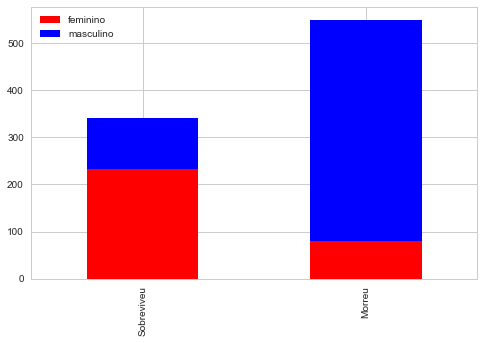

In [11]:
sns.set(style="whitegrid")
df.plot(kind='bar',stacked=True, figsize=(8,5), color=['r','b'])
plt.show()

<h3>Name, Ticket e Cabin</h3>

Não usaremos as colunas Name, Ticket e Cabin. No entanto, observe que na coluna Name, junto aos nomes, há pronomes de tratamento que podem indicar certo status social da pessoa. Essa é uma informação relevante para essa análise. Os tickets e as Cabines também podem revelar informações sobre status que, por sua vez, está relacionado a sobrevivência no Titanic.

In [12]:
combined.drop('Name',axis=1,inplace=True)
combined.drop('Ticket',axis=1,inplace=True)
combined.drop('Cabin',axis=1,inplace=True)

<h3>Pclass</h3>

In [13]:
combined['Pclass'].unique()

array([3, 1, 2], dtype=int64)

Não temos dados perdidos. Temos dados categóricos divididos em 3 classes. Utilizaremos dummies aqui!

In [14]:
pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
combined = pd.concat([combined,pclass_dummies],axis=1)
combined.drop('Pclass',axis=1,inplace=True)

In [15]:
combined.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [16]:
# será que os ricos sobrevireram mais?
gp_pclass = data.groupby(['Pclass']).mean()
gp_pclass[['Survived']]

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
# Em números
gp_pclass = data.groupby(['Pclass']).count()
gp_pclass[['Survived']]

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
survived_pclass = data[data['Survived']==1]['Pclass'].value_counts()
dead_pclass = data[data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived_pclass,dead_pclass])
df.index = ['Sobreviveu','Morreu']
df.columns = ['1ª classe', '2ª classe', '3ª classe']
df

,1ª classe,2ª classe,3ª classe
Sobreviveu,136,87,119
Morreu,80,97,372


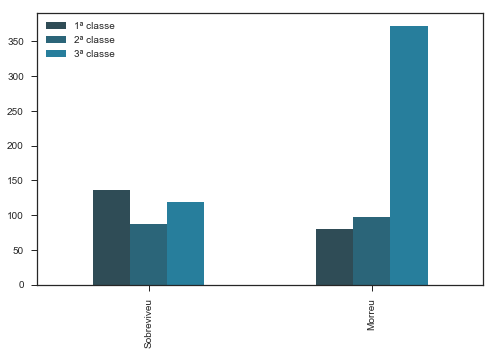

In [19]:
sns.set_style("ticks")
sns.set_palette("PuBuGn_d")
df.plot(kind='bar',stacked=False, figsize=(8,5))
plt.show()

<h3>Age</h3>

Há dados perdidos em idades. Preencheremos esses dados com a média. No entanto é importante analisar a média considerando classes. Por exemplo, provavelmente a idade média entre as pessoas que sobreviveram é diferente da idade média entre as pessoas que morreram. tudo isso é importante para melhorar o preprocessamento.

In [20]:
combined["Age"] = combined["Age"].fillna(value=combined["Age"].mean())

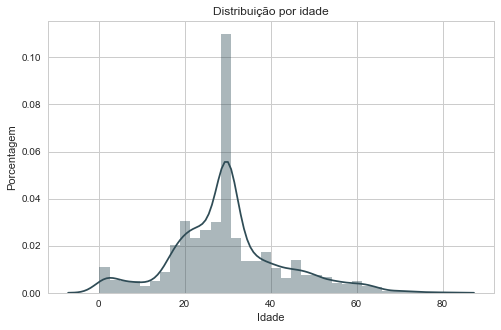

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.distplot(combined.Age)
plt.xlabel('Idade')
plt.ylabel('Porcentagem')
plt.title('Distribuição por idade')
plt.show()

<h3>Fare</h3>

Aqui trataremos de maneira análoga ao feito com a coluna idade. As observações lá também valem aqui.

In [22]:
combined.Fare.fillna(combined.Fare.mean(),inplace=True)

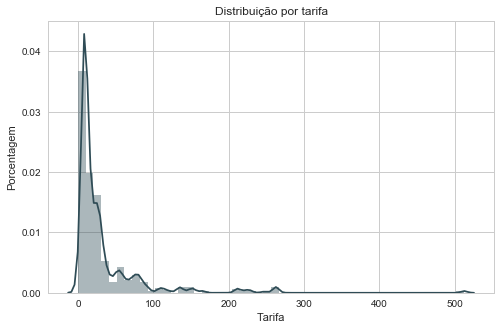

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.distplot(combined.Fare)
plt.xlabel('Tarifa')
plt.ylabel('Porcentagem')
plt.title('Distribuição por tarifa')
plt.show()

Usaremos o DataFrame data para saber qual impacto a tarifa teve na sobrevivência dos tripulantes.

In [24]:
data.Fare.fillna(data.Fare.mean(),inplace=True)

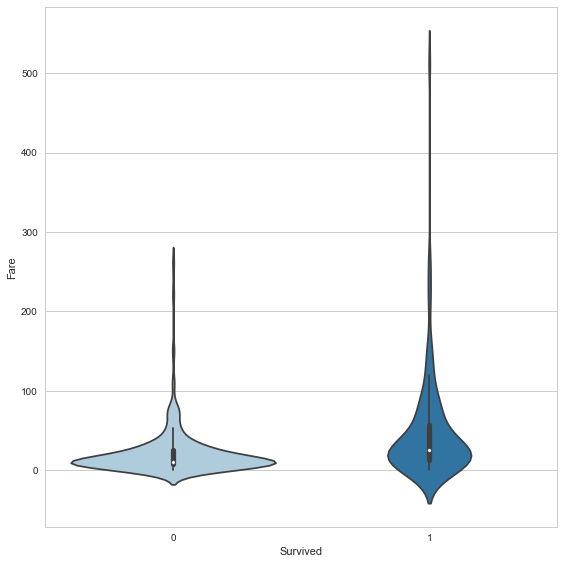

In [25]:
plt.figure(figsize=(8,8))
sns.set_palette("Paired")
sns.violinplot(x='Survived', y='Fare', data=data)
plt.tight_layout() 
plt.show()

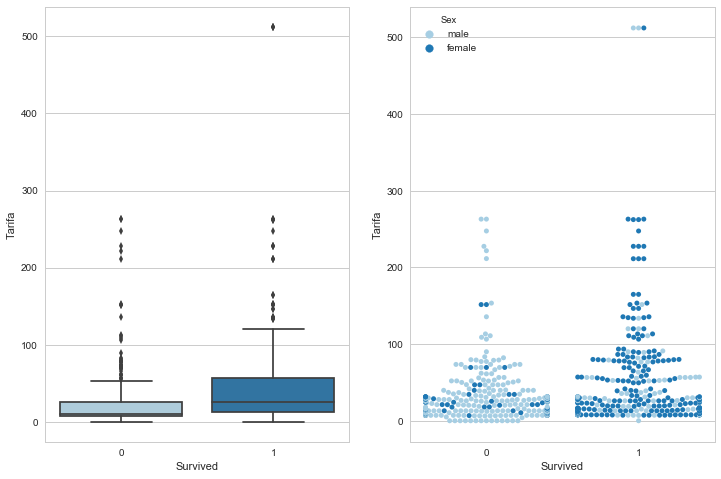

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Fare', data=data)
plt.ylabel('Tarifa')
plt.subplot(1,2,2)
sns.swarmplot(x='Survived', y='Fare', data=data, hue="Sex")
plt.ylabel('Tarifa')
plt.show()

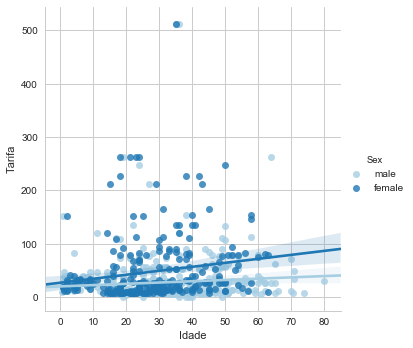

In [27]:
sns.lmplot(x='Age', y='Fare', data=data, hue='Sex')
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()

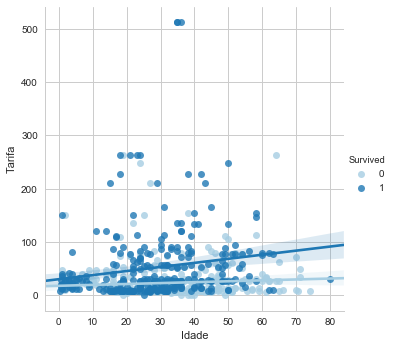

In [28]:
sns.lmplot(x='Age', y='Fare', data=data, hue='Survived')
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()

<h3>Embarked</h3>

In [29]:
combined.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

Para categóricos com mais de duas classes usamos dummies. No entanto é necessário preencher os dados perdidos. Como são categóricos, preencheremos com a moda.

In [30]:
print("S:", combined[combined['Embarked']=='S'].shape[0])
print("C:", combined[combined['Embarked']=='C'].shape[0])
print("Q:", combined[combined['Embarked']=='Q'].shape[0])

S: 914
C: 270
Q: 123


In [31]:
# preenchendo os perdidos de combined
combined.Embarked.fillna('S',inplace=True)

In [32]:
# dummies
embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
combined = pd.concat([combined,embarked_dummies],axis=1)
combined.drop('Embarked',axis=1,inplace=True)

Utilizaremos data para avaliar o target em relação ao portão de embarque.

In [33]:
# preenchendo os perdidos de data
data.Embarked.fillna('S',inplace=True)

In [34]:
survived_embarked = data[data['Survived']==1]['Embarked'].value_counts()
dead_embarked = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embarked,dead_embarked])
df.index = ['Sobreviveu','Morreu']
df

,S,C,Q
Sobreviveu,219,93,30
Morreu,427,75,47


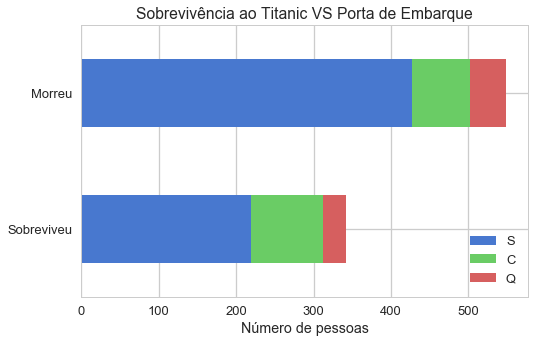

In [35]:
sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context("talk") # para palestras, notebook é o padrão
df.plot(kind='barh',stacked=True, figsize=(8,5))
plt.xlabel("Número de pessoas")
plt.title("Sobrevivência ao Titanic VS Porta de Embarque")
plt.show()

<h3>Parch e Siblings</h3>

Criaremos novas colunas que identificam o número de familiares a bordo do Titanic.

In [36]:
# somando os pais, mais os irmãos, mais o próprio passageiro
combined['TamanhoFamilia'] = combined['Parch'] + combined['SibSp'] + 1
# criando novas colunas
combined['Solitario'] = combined['TamanhoFamilia'].map(lambda s : 1 if s == 1 else 0)
combined['FamiliaPequena'] = combined['TamanhoFamilia'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['FamiliaGrande'] = combined['TamanhoFamilia'].map(lambda s : 1 if 5<=s else 0)

In [37]:
combined.columns

Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'TamanhoFamilia', 'Solitario', 'FamiliaPequena', 'FamiliaGrande'],
      dtype='object')

In [38]:
combined.drop('SibSp',axis=1,inplace=True)
combined.drop('Parch',axis=1,inplace=True)
combined.drop('TamanhoFamilia',axis=1,inplace=True)

Fazendo o mesmo com data para que possamos analisar o impacto do número de familiares a bordo com a sobrevivência no Titanic.

In [39]:
data['TamanhoFamilia'] = data['Parch'] + data['SibSp'] + 1

In [40]:
survived_TamanhoFamilia = data[data['Survived']==1]['TamanhoFamilia'].value_counts()
dead_TamanhoFamilia = data[data['Survived']==0]['TamanhoFamilia'].value_counts()
df = pd.DataFrame([survived_TamanhoFamilia,dead_TamanhoFamilia])
df.index = ['Sobreviveu','Morreu']
df

,1,2,3,4,5,6,7,8,11
Sobreviveu,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN
Morreu,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0


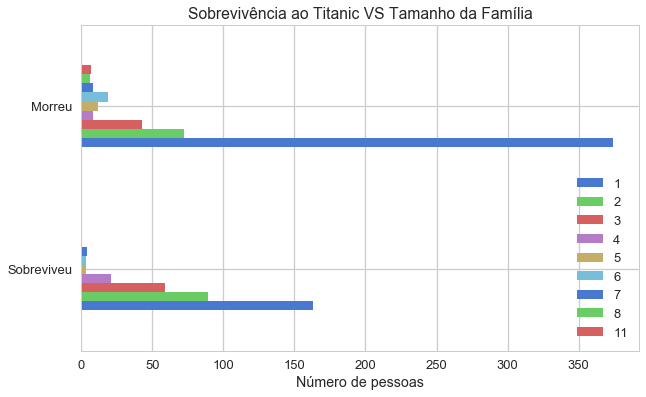

In [42]:
sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context("talk") # para palestras, notebook é o padrão
df.plot(kind='barh',stacked=False, figsize=(10,6))
plt.xlabel("Número de pessoas")
plt.title("Sobrevivência ao Titanic VS Tamanho da Família")
plt.show()

<h2>Normalizando os dados</h2>

In [43]:
# guardando os nomes das colunas numa lista
features = list(combined.columns)
# removendo a coluna PassengerId
features.remove('PassengerId')
# aplicando a função de normalização
combined[features] = combined[features].apply(lambda x: x/x.max(), axis=0)

<h2>Recuperando os conjuntos de Treino e Teste</h2>

In [54]:
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [55]:
combined.shape

(1309, 13)

In [56]:
targets = train.Survived
train = combined.iloc[0:891]
test = combined.iloc[891:]

<h2>Modelagem</h2>

Primeiro construiremos os conjuntos para treinar o modelo.

In [87]:
X = train
y = targets
# separando o conjunto de treino e de teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

<h3>Random Forest</h3>

In [88]:
# importando o classificador Random Forest
from sklearn.ensemble import RandomForestClassifier
# instanciando o modelo
forest = RandomForestClassifier()
# ajustando o modelo aos dados
forest = forest.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = forest.predict(X_test)
# importando as métricas de precisão
from sklearn.metrics import classification_report
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.91      0.87       220
          1       0.83      0.69      0.76       137

avg / total       0.83      0.83      0.83       357



In [89]:
# Salvando para submissão
Y_pred = forest.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('forest_1.csv', index=False)

Resultado no kaggle: 0.75598 (6832/8146)<br/>
Top: 83%

<h3>Random Forest Tunado</h3>

In [90]:
from sklearn.model_selection import GridSearchCV
# criando a grade
param_grid = {
    'n_estimators':np.arange(100,200,10),
    'max_depth':np.arange(5,10),
    'max_features':np.arange(9,13),
    'criterion': ['gini','entropy']
}
# criando o modelo default
forest = RandomForestClassifier()
# criando o modelo a ser tunado
forest_cv = GridSearchCV(forest, param_grid, cv=5)
# tunando
forest_cv.fit(X_train,y_train)
# mostrando os melhores parâmetros e o melhor score
forest_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 9, 'n_estimators': 100}

In [91]:
# instanciando o modelo tunado
forest = RandomForestClassifier(
    criterion='gini', 
    max_depth=6, 
    max_features=9, 
    n_estimators=100
)
# ajustando o modelo aos dados
forest = forest.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = forest.predict(X_test)
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.94      0.88       220
          1       0.88      0.68      0.77       137

avg / total       0.84      0.84      0.84       357



In [94]:
# Salvando para submissão
Y_pred = forest.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('forest_3.csv', index=False)

Resultado no kaggle: 0.77033 (5169/8146)<br/>
Top: 63%

<h3>Gradient Boosting</h3>

In [108]:
# importando o classificador Random Forest
from sklearn.ensemble import GradientBoostingClassifier
# instanciando o modelo
gradient = GradientBoostingClassifier()
# ajustando o modelo aos dados
gradient = gradient.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = gradient.predict(X_test)
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.93      0.88       220
          1       0.86      0.69      0.77       137

avg / total       0.84      0.84      0.84       357



In [110]:
Y_pred = gradient.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('gradient.csv', index=False)

<h3>Gradient Boosting Tunado</h3>

Para aprender maneiras eficientes de tunas o Gradient boosting:<br/>
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [98]:
gradient = GradientBoostingClassifier(learning_rate=0.005, n_estimators=250,max_depth=10, subsample=0.5,max_features=0.5)

Parâmetros tirados de https://github.com/savarin/titanic/blob/master/gradientboosting.py

In [99]:
gradient = gradient.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = gradient.predict(X_test)
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.94      0.88       220
          1       0.88      0.67      0.76       137

avg / total       0.84      0.84      0.83       357



In [100]:
Y_pred = gradient.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('gradient_tunado.csv', index=False)

Resultado no kaggle: 0.77033 (mesmo do Random Forest Tunado)

<h3>Extra trees</h3>

In [101]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra = extra.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = extra.predict(X_test)
# importando as métricas de precisão
from sklearn.metrics import classification_report
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       220
          1       0.78      0.69      0.73       137

avg / total       0.80      0.80      0.80       357



In [102]:
# Salvando para submissão
Y_pred = extra.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('extra.csv', index=False)

Resutado: 0.66507 (esperado pelos baixos score no relatório de classificação)

<h3>Extra trees tunado</h3>

In [104]:
param_grid = {
    'n_estimators':np.arange(100,200,10),
    'max_depth':np.arange(5,10),
    'max_features':np.arange(9,13),
    'criterion': ['gini','entropy']
}
# criando o modelo default
extra = ExtraTreesClassifier()
# criando o modelo a ser tunado
extra_cv = GridSearchCV(extra, param_grid, cv=5)
# tunando
extra_cv.fit(X_train,y_train)
# mostrando os melhores parâmetros e o melhor score
extra_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'n_estimators': 120}

In [106]:
extra = ExtraTreesClassifier(
    criterion = 'gini',
    max_depth = 5,
    max_features = 10,
    n_estimators = 120
)
extra = extra.fit(X_train, y_train)
# gerando as classificações para o conjunto de test
y_pred = extra.predict(X_test)
# importando as métricas de precisão
from sklearn.metrics import classification_report
# gerando métricas associadas a matriz de confusão
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.82      0.94      0.88       220
          1       0.88      0.67      0.76       137

avg / total       0.84      0.84      0.83       357



In [107]:
# Salvando para submissão
Y_pred = extra.predict(test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('extra_tunado.csv', index=False)

Resultado no kaggle: 0.78468 (3638/8146)<br/>
Top: 44%

Resumindo:
<table cellspacing="2" cellpadding="4" style="border:solid 2px; margin:auto;" >
    <tr style="border:solid 2px;">
          <td height='50' bgcolor='#D4D0C8' style="border:solid 2px;"><b>Submission</td>
          <td height='50' bgcolor='#D4D0C8' style="border:solid 2px;"><b>Score</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Random Forest </td>
        <td style="border:solid 2px;">0.75598</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Random Forest Tunado </td>
        <td style="border:solid 2px;">0.77033</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Gradient Boosting</td>
        <td style="border:solid 2px;"> 0.74641</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Gradient Boosting Tunado </td>
        <td style="border:solid 2px;"> 0.77033</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Extra Trees</td>
        <td style="border:solid 2px;"> 0.66507</td>
    </tr>
    <tr style="border:solid 2px;">
        <td style="border:solid 2px;"> Extra Trees tunado </td>
        <td style="border:solid 2px;"> 0.78468</td>
    </tr>
</table>

Como melhorar? 
<ul>
<li>Experimentos tunas grades diferentes de parâmetros e treine outros modelos.</li>
<li>Use as colunas descartadas no preprocessamento</li>
<li>preencha os dados perdidos considerando estatísticas em agrupamentos que estes pertençam.</li>
</ul>